<a href="https://colab.research.google.com/github/ravindrabajpai/sp_forecasting/blob/main/fa_assignment/master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
install.packages("quantmod")
install.packages("qrmtools")
install.packages("MASS")
install.packages("PerformanceAnalytics")
install.packages("TSA")
install.packages("forecast")
install.packages("fBasics")
install.packages("urca")
install.packages("DescTools")
install.packages("TTR")
install.packages("tseries")
install.packages("fBasics")
install.packages("lubridate")
install.packages("bestNormalize") # to use yeo.jhonson for negative values.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Inst

# New Section

In [14]:
library(quantmod)
library(qrmtools)
library(MASS)
library(PerformanceAnalytics)
library(TSA)
library(forecast)
library(fBasics)
library(urca)
library(DescTools)
library(TTR)
library(tseries)
library(fBasics)
library(lubridate)
library(bestNormalize)

In [15]:
get_start_date <- function(num_years=5) {
  return(Sys.Date() - years(num_years))
}

start_date <- get_start_date()
start_date


[1] "2017-04-27"

In [257]:
# Download data from Yahoo Finance
bob<-getSymbols("BANKBARODA.NS",from=start_date,auto.assign=FALSE)
sbi<-getSymbols("SBIN.NS",from=start_date,auto.assign=FALSE)
ibn<-getSymbols("IBN",from=start_date,auto.assign=FALSE)
axis<-getSymbols("AXISBANK.NS",from=start_date,auto.assign=FALSE)
crude<-getSymbols("CL=F",from=start_date,auto.assign=FALSE)
inr_usd<-getSymbols("INR=X",from=start_date,auto.assign=FALSE)
gold<-getSymbols("GC=F",from=start_date,auto.assign=FALSE)




Warning message:
“INR=X contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“GC=F contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


In [259]:
summary(bob)
summary(sbi)
summary(ibn)
summary(axis)
summary(crude)
summary(inr_usd)
summary(gold)



     Index            BANKBARODA.NS.Open BANKBARODA.NS.High BANKBARODA.NS.Low
 Min.   :2017-04-27   Min.   : 36.15     Min.   : 37.20     Min.   : 36.0    
 1st Qu.:2018-07-21   1st Qu.: 79.40     1st Qu.: 80.75     1st Qu.: 78.0    
 Median :2019-10-31   Median :102.20     Median :103.75     Median :100.1    
 Mean   :2019-10-26   Mean   :104.91     Mean   :106.86     Mean   :102.8    
 3rd Qu.:2021-01-23   3rd Qu.:133.60     3rd Qu.:136.85     3rd Qu.:130.8    
 Max.   :2022-04-26   Max.   :197.00     Max.   :206.65     Max.   :192.2    
 BANKBARODA.NS.Close BANKBARODA.NS.Volume BANKBARODA.NS.Adjusted
 Min.   : 36.50      Min.   :  1510641    Min.   : 36.50        
 1st Qu.: 79.45      1st Qu.: 13836107    1st Qu.: 79.45        
 Median :101.90      Median : 22911875    Median :101.90        
 Mean   :104.66      Mean   : 29459476    Mean   :104.61        
 3rd Qu.:133.30      3rd Qu.: 36705476    3rd Qu.:133.30        
 Max.   :195.75      Max.   :256891275    Max.   :194.34        

     Index             SBIN.NS.Open    SBIN.NS.High    SBIN.NS.Low   
 Min.   :2017-04-27   Min.   :151.9   Min.   :153.2   Min.   :149.4  
 1st Qu.:2018-07-21   1st Qu.:264.4   1st Qu.:268.4   1st Qu.:260.6  
 Median :2019-10-31   Median :296.5   Median :300.9   Median :292.6  
 Mean   :2019-10-26   Mean   :316.3   Mean   :320.6   Mean   :311.5  
 3rd Qu.:2021-01-23   3rd Qu.:354.4   3rd Qu.:359.2   3rd Qu.:349.5  
 Max.   :2022-04-26   Max.   :544.0   Max.   :549.0   Max.   :537.1  
 SBIN.NS.Close   SBIN.NS.Volume      SBIN.NS.Adjusted
 Min.   :150.8   Min.   :  2095795   Min.   :149.5   
 1st Qu.:263.5   1st Qu.: 16094513   1st Qu.:261.1   
 Median :296.4   Median : 24119619   Median :293.4   
 Mean   :315.9   Mean   : 33159632   Mean   :313.8   
 3rd Qu.:353.9   3rd Qu.: 42348418   3rd Qu.:350.6   
 Max.   :540.5   Max.   :262677081   Max.   :540.5   

     Index               IBN.Open        IBN.High        IBN.Low      
 Min.   :2017-04-27   Min.   : 7.29   Min.   : 7.42   Min.   : 6.860  
 1st Qu.:2018-07-26   1st Qu.: 9.28   1st Qu.: 9.37   1st Qu.: 9.205  
 Median :2019-10-25   Median :10.96   Median :11.05   Median :10.880  
 Mean   :2019-10-26   Mean   :12.51   Mean   :12.60   Mean   :12.402  
 3rd Qu.:2021-01-26   3rd Qu.:15.19   3rd Qu.:15.24   3rd Qu.:15.095  
 Max.   :2022-04-26   Max.   :22.28   Max.   :22.34   Max.   :22.060  
   IBN.Close        IBN.Volume        IBN.Adjusted   
 Min.   : 6.900   Min.   : 1501100   Min.   : 6.879  
 1st Qu.: 9.285   1st Qu.: 4808700   1st Qu.: 9.236  
 Median :10.960   Median : 6717800   Median :10.911  
 Mean   :12.505   Mean   : 7798337   Mean   :12.464  
 3rd Qu.:15.185   3rd Qu.: 9412100   3rd Qu.:15.140  
 Max.   :22.220   Max.   :38079300   Max.   :22.220  

     Index            AXISBANK.NS.Open AXISBANK.NS.High AXISBANK.NS.Low
 Min.   :2017-04-27   Min.   :293.5    Min.   :337.5    Min.   :286.0  
 1st Qu.:2018-07-21   1st Qu.:521.0    1st Qu.:527.9    1st Qu.:513.4  
 Median :2019-10-31   Median :639.0    Median :650.0    Median :628.5  
 Mean   :2019-10-26   Mean   :625.7    Mean   :634.1    Mean   :616.3  
 3rd Qu.:2021-01-23   3rd Qu.:736.0    3rd Qu.:745.0    3rd Qu.:727.0  
 Max.   :2022-04-26   Max.   :848.4    Max.   :866.9    Max.   :825.5  
 AXISBANK.NS.Close AXISBANK.NS.Volume AXISBANK.NS.Adjusted
 Min.   :303.1     Min.   :  793433   Min.   :303.1       
 1st Qu.:520.2     1st Qu.: 6425286   1st Qu.:519.4       
 Median :638.2     Median : 9305124   Median :637.4       
 Mean   :625.1     Mean   :13631156   Mean   :624.6       
 3rd Qu.:736.1     3rd Qu.:16171490   3rd Qu.:736.1       
 Max.   :845.1     Max.   :96186227   Max.   :845.1       

     Index              CL=F.Open        CL=F.High         CL=F.Low     
 Min.   :2017-04-27   Min.   :-14.00   Min.   : 13.69   Min.   :-40.32  
 1st Qu.:2018-07-26   1st Qu.: 49.27   1st Qu.: 49.83   1st Qu.: 48.55  
 Median :2019-10-26   Median : 58.27   Median : 58.88   Median : 57.41  
 Mean   :2019-10-27   Mean   : 58.86   Mean   : 59.88   Mean   : 57.78  
 3rd Qu.:2021-01-27   3rd Qu.: 67.70   3rd Qu.: 68.56   3rd Qu.: 66.56  
 Max.   :2022-04-26   Max.   :124.66   Max.   :130.50   Max.   :117.07  
   CL=F.Close      CL=F.Volume      CL=F.Adjusted   
 Min.   :-37.63   Min.   :  60179   Min.   :-37.63  
 1st Qu.: 49.34   1st Qu.: 375862   1st Qu.: 49.34  
 Median : 58.18   Median : 530841   Median : 58.18  
 Mean   : 58.86   Mean   : 537917   Mean   : 58.86  
 3rd Qu.: 67.70   3rd Qu.: 698820   3rd Qu.: 67.70  
 Max.   :123.70   Max.   :2288230   Max.   :123.70  

     Index              INR=X.Open      INR=X.High      INR=X.Low    
 Min.   :2017-04-27   Min.   :63.27   Min.   :63.42   Min.   :63.21  
 1st Qu.:2018-07-27   1st Qu.:68.63   1st Qu.:68.90   1st Qu.:68.45  
 Median :2019-10-28   Median :71.73   Median :71.97   Median :71.46  
 Mean   :2019-10-27   Mean   :71.01   Mean   :71.25   Mean   :70.78  
 3rd Qu.:2021-01-26   3rd Qu.:74.24   3rd Qu.:74.46   3rd Qu.:74.04  
 Max.   :2022-04-27   Max.   :77.69   Max.   :77.75   Max.   :76.73  
                      NA's   :3       NA's   :3       NA's   :3      
  INR=X.Close     INR=X.Volume INR=X.Adjusted 
 Min.   :63.27   Min.   :0     Min.   :63.27  
 1st Qu.:68.73   1st Qu.:0     1st Qu.:68.73  
 Median :71.74   Median :0     Median :71.74  
 Mean   :71.03   Mean   :0     Mean   :71.03  
 3rd Qu.:74.25   3rd Qu.:0     3rd Qu.:74.25  
 Max.   :77.57   Max.   :0     Max.   :77.57  
 NA's   :3       NA's   :3     NA's   :3      

     Index              GC=F.Open      GC=F.High       GC=F.Low   
 Min.   :2017-04-27   Min.   :1173   Min.   :1180   Min.   :1161  
 1st Qu.:2018-07-26   1st Qu.:1287   1st Qu.:1291   1st Qu.:1284  
 Median :2019-10-26   Median :1496   Median :1505   Median :1487  
 Mean   :2019-10-27   Mean   :1540   Mean   :1547   Mean   :1533  
 3rd Qu.:2021-01-27   3rd Qu.:1794   3rd Qu.:1804   3rd Qu.:1788  
 Max.   :2022-04-26   Max.   :2054   Max.   :2072   Max.   :2040  
                      NA's   :1      NA's   :1      NA's   :1     
   GC=F.Close    GC=F.Volume       GC=F.Adjusted 
 Min.   :1176   Min.   :     0.0   Min.   :1176  
 1st Qu.:1287   1st Qu.:    35.5   1st Qu.:1287  
 Median :1497   Median :   155.0   Median :1497  
 Mean   :1540   Mean   :  5837.8   Mean   :1540  
 3rd Qu.:1796   3rd Qu.:   543.0   3rd Qu.:1796  
 Max.   :2052   Max.   :386334.0   Max.   :2052  
 NA's   :1      NA's   :1          NA's   :1     

In [260]:
master<-merge(bob[,6],sbi[,6],ibn[,6],axis[,6],crude[,6],inr_usd[,6],gold[,6])
master<-na.omit(master)
summary(master)

     Index            BANKBARODA.NS.Adjusted SBIN.NS.Adjusted  IBN.Adjusted   
 Min.   :2017-04-27   Min.   : 36.50         Min.   :149.5    Min.   : 6.879  
 1st Qu.:2018-07-24   1st Qu.: 79.28         1st Qu.:260.8    1st Qu.: 9.232  
 Median :2019-11-04   Median :101.85         Median :293.1    Median :10.851  
 Mean   :2019-10-28   Mean   :104.36         Mean   :313.5    Mean   :12.476  
 3rd Qu.:2021-01-27   3rd Qu.:133.05         3rd Qu.:350.6    3rd Qu.:15.175  
 Max.   :2022-04-26   Max.   :194.34         Max.   :540.5    Max.   :22.220  
 AXISBANK.NS.Adjusted CL.F.Adjusted    INR.X.Adjusted  GC.F.Adjusted 
 Min.   :303.1        Min.   :-37.63   Min.   :63.27   Min.   :1176  
 1st Qu.:518.8        1st Qu.: 49.23   1st Qu.:68.68   1st Qu.:1288  
 Median :638.2        Median : 58.11   Median :71.76   Median :1498  
 Mean   :624.0        Mean   : 58.82   Mean   :71.03   Mean   :1542  
 3rd Qu.:736.1        3rd Qu.: 67.73   3rd Qu.:74.25   3rd Qu.:1798  
 Max.   :845.1        Max. 

In [261]:
master_returns<-CalculateReturns(master,method = "log")
master_returns<-na.omit(master_returns)
basicStats(master_returns)

Warning message in log(pr):
“NaNs produced”


,BANKBARODA.NS.Adjusted,SBIN.NS.Adjusted,IBN.Adjusted,AXISBANK.NS.Adjusted,CL.F.Adjusted,INR.X.Adjusted,GC.F.Adjusted
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nobs,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000
NAs,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Minimum,-0.178853,-0.144586,-0.150417,-0.327266,-0.282206,-0.019332,-0.051069
Maximum,0.273346,0.244413,0.138016,0.177985,0.333161,0.026395,0.057775
1. Quartile,-0.015027,-0.011344,-0.010867,-0.010839,-0.010819,-0.002391,-0.003749
3. Quartile,0.015421,0.012727,0.012117,0.011949,0.013912,0.002453,0.005317
Mean,-0.000345,0.000542,0.000874,0.000475,0.001118,0.000154,0.000348
Median,-0.000361,0.000245,0.000774,0.000127,0.002512,-0.000002,0.000777
Sum,-0.410801,0.646638,1.042092,0.565641,1.332495,0.183110,0.415080


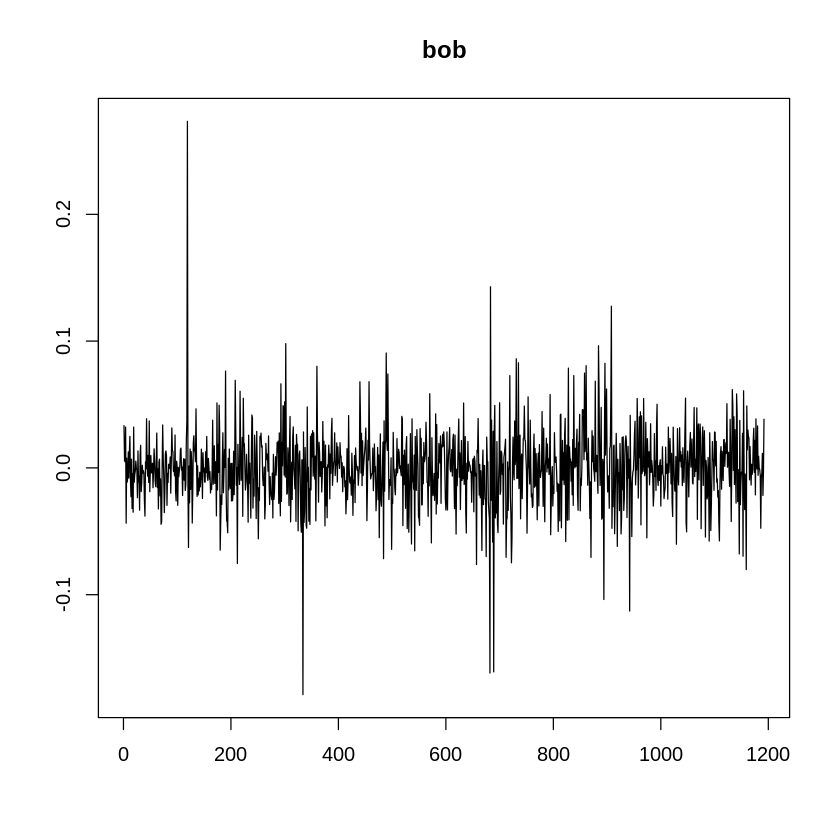

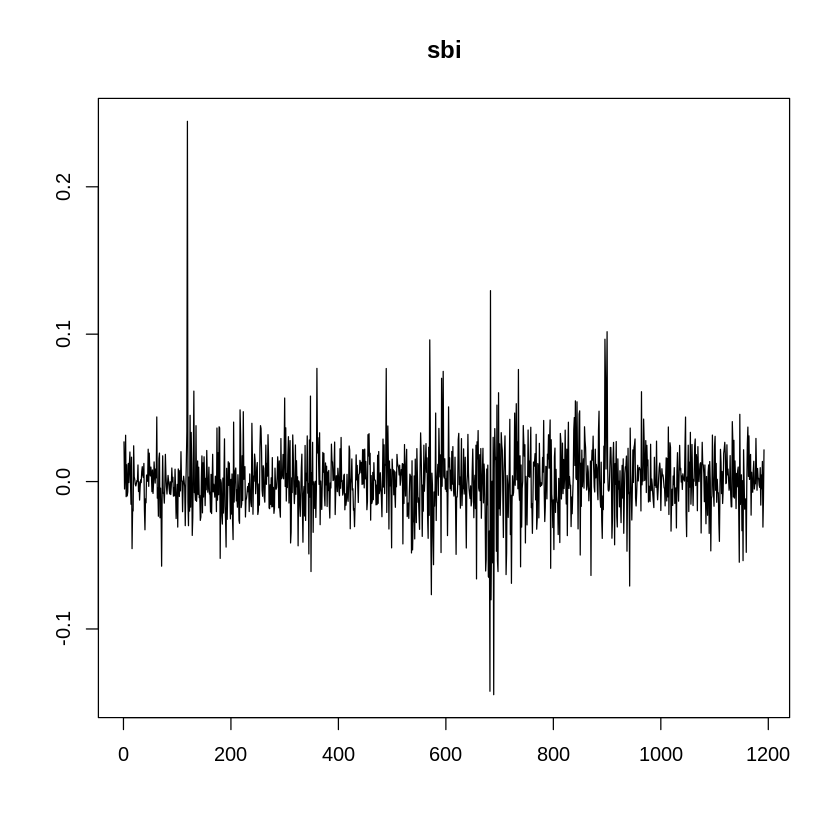

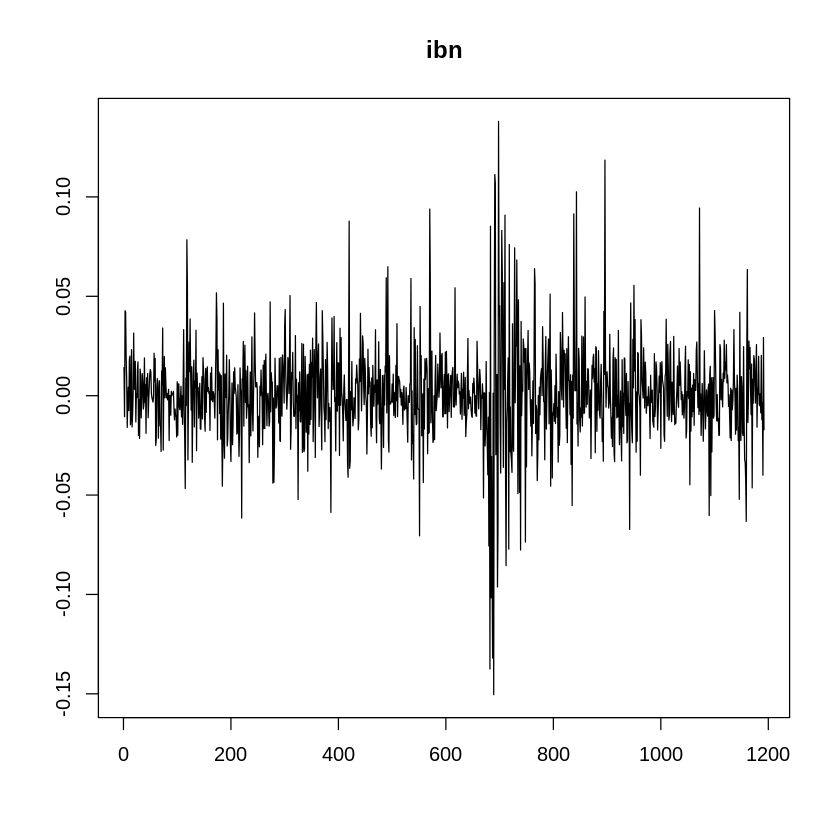

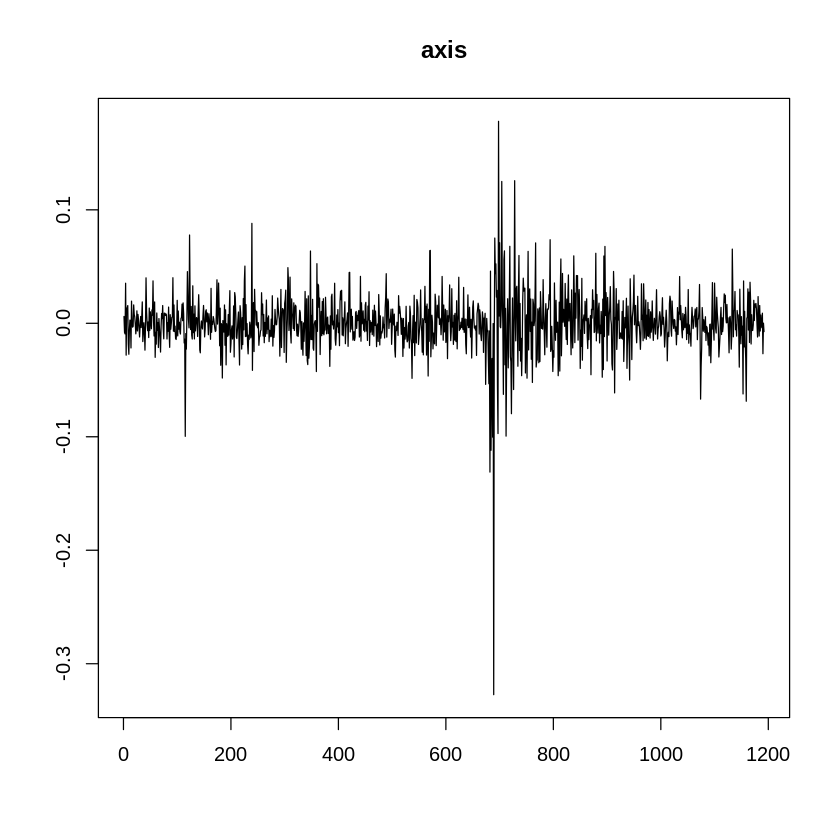

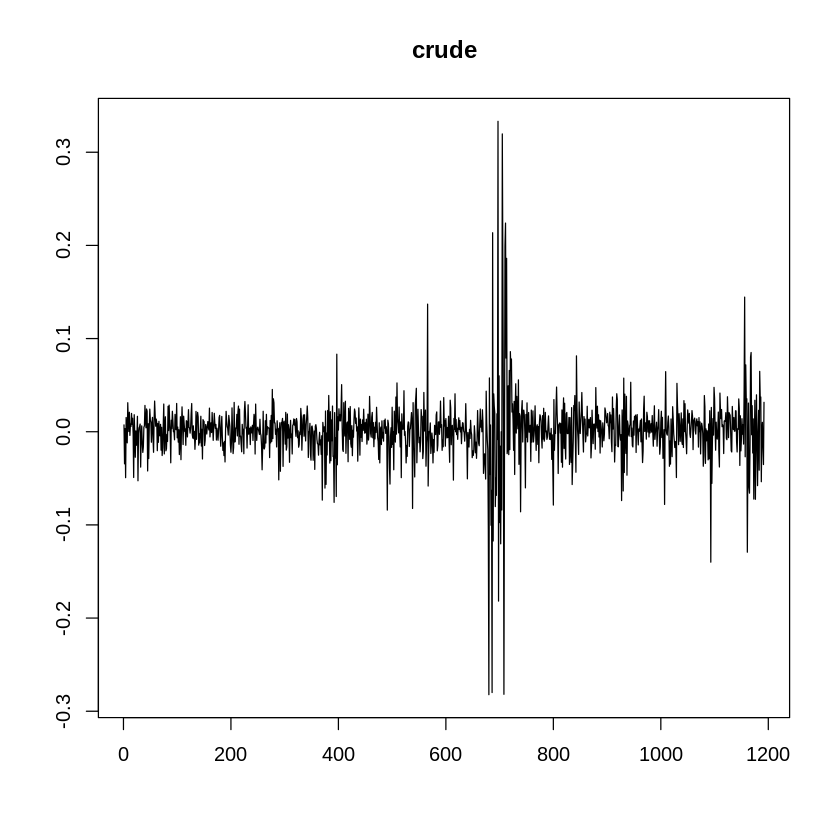

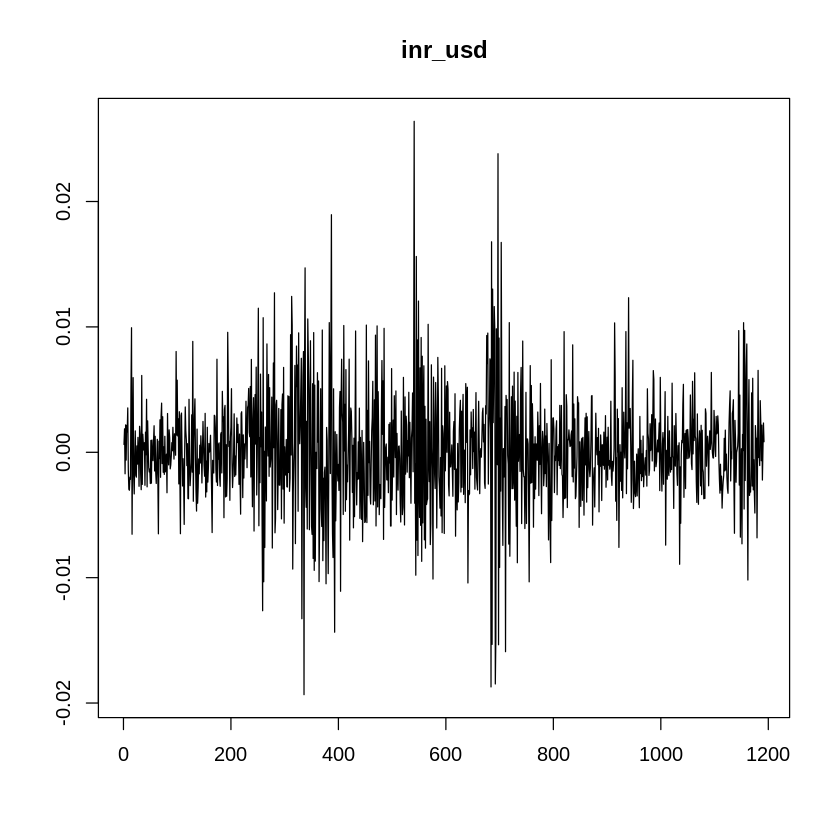

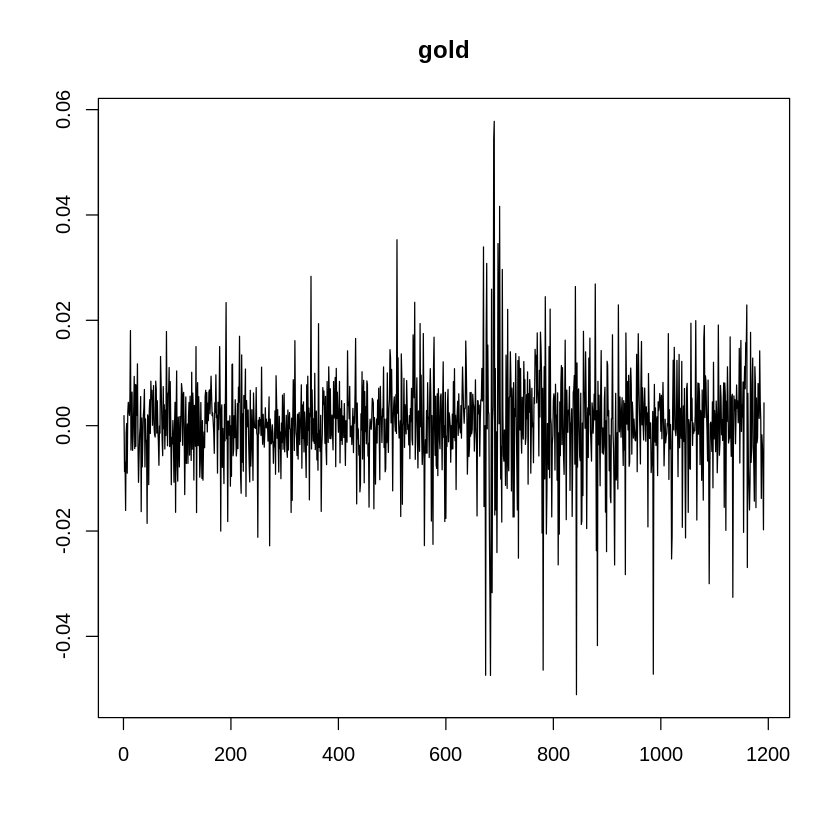

In [262]:
layout(matrix(1:5, nrow = 1, ncol = 1))
plot.ts(master_returns$BANKBARODA.NS.Adjusted, main = "bob", ylab = "", xlab = "")
plot.ts(master_returns$SBIN.NS.Adjusted, main = "sbi", ylab = "", xlab = "")
plot.ts(master_returns$IBN.Adjusted, main = "ibn", ylab = "", xlab = "")
plot.ts(master_returns$AXISBANK.NS.Adjusted, main = "axis", ylab = "", xlab = "")
plot.ts(master_returns$CL.F.Adjusted, main = "crude", ylab = "", xlab = "")
plot.ts(master_returns$INR.X.Adjusted, main = "inr_usd", ylab = "", xlab = "")
plot.ts(master_returns$GC.F.Adjusted, main = "gold", ylab = "", xlab = "")


In [265]:
install.packages("vars")
library(vars)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘strucchange’, ‘sandwich’


Loading required package: strucchange

Loading required package: sandwich

Loading required package: lmtest


Attaching package: ‘vars’


The following object is masked from ‘package:DescTools’:

    Phi




In [267]:
par(mar=c(0,0,0,0))
VARselect(master_returns, lag.max = 30, type = "const")



,1,2,3,4,5,6,7,8,9,10,⋯,21,22,23,24,25,26,27,28,29,30
AIC(n),-5.824788e+01,-5.825166e+01,-5.828228e+01,-5.830469e+01,-5.831555e+01,-5.834869e+01,-5.832051e+01,-5.832245e+01,-5.830376e+01,-5.830051e+01,⋯,-5.812746e+01,-5.810318e+01,-5.807051e+01,-5.806784e+01,-5.802781e+01,-5.801287e+01,-5.799472e+01,-5.798423e+01,-5.795172e+01,-5.792592e+01
HQ(n),-5.815592e+01,-5.807923e+01,-5.802937e+01,-5.797132e+01,-5.790171e+01,-5.785437e+01,-5.774572e+01,-5.766719e+01,-5.756804e+01,-5.748431e+01,⋯,-5.642609e+01,-5.632134e+01,-5.620820e+01,-5.612506e+01,-5.600456e+01,-5.590915e+01,-5.581053e+01,-5.571957e+01,-5.560658e+01,-5.550031e+01
SC(n),-5.800413e+01,-5.779462e+01,-5.761195e+01,-5.742109e+01,-5.721866e+01,-5.703851e+01,-5.679705e+01,-5.658570e+01,-5.635373e+01,-5.613719e+01,⋯,-5.361801e+01,-5.338044e+01,-5.313449e+01,-5.291854e+01,-5.266522e+01,-5.243700e+01,-5.220556e+01,-5.198179e+01,-5.173599e+01,-5.149690e+01
FPE(n),5.049720e-26,5.030701e-26,4.879124e-26,4.771163e-26,4.719947e-26,4.566560e-26,4.697701e-26,4.689453e-26,4.778996e-26,4.795948e-26,⋯,5.751665e-26,5.901626e-26,6.107370e-26,6.134403e-26,6.397097e-26,6.506761e-26,6.640768e-26,6.726944e-26,6.967274e-26,7.169272e-26


In [268]:
var1 <- VAR(master_returns, p = 27, type = "const")
coef(var1)


,Estimate,Std. Error,t value,Pr(>|t|)
BANKBARODA.NS.Adjusted.l1,-0.061985170,0.04713824,-1.31496560,1.888307e-01
SBIN.NS.Adjusted.l1,-0.018974152,0.06627383,-0.28629931,7.747097e-01
IBN.Adjusted.l1,0.231730998,0.05352345,4.32952244,1.648683e-05
AXISBANK.NS.Adjusted.l1,-0.112497049,0.05461558,-2.05979786,3.968286e-02
CL.F.Adjusted.l1,-0.061859469,0.03172687,-1.94975025,5.149225e-02
INR.X.Adjusted.l1,0.181814129,0.24520903,0.74146587,4.585896e-01
GC.F.Adjusted.l1,0.076894469,0.10018290,0.76754087,4.429458e-01
BANKBARODA.NS.Adjusted.l2,-0.117292588,0.04723667,-2.48308323,1.319229e-02
SBIN.NS.Adjusted.l2,0.089946094,0.06637382,1.35514420,1.756855e-01
IBN.Adjusted.l2,0.169804800,0.05859200,2.89808845,3.838528e-03


In [269]:
summary(var1)



VAR Estimation Results:
Endogenous variables: BANKBARODA.NS.Adjusted, SBIN.NS.Adjusted, IBN.Adjusted, AXISBANK.NS.Adjusted, CL.F.Adjusted, INR.X.Adjusted, GC.F.Adjusted 
Deterministic variables: const 
Sample size: 1165 
Log Likelihood: 23549.01 
Roots of the characteristic polynomial:
0.9687 0.9687 0.9624 0.9624 0.9611 0.9611 0.959 0.959 0.9583 0.9583 0.9579 0.9579 0.9571 0.9571 0.9568 0.9568 0.9568 0.9568 0.9565 0.9565 0.9561 0.9561 0.9558 0.9558 0.9557 0.9557 0.9553 0.9553 0.9549 0.9549 0.9535 0.9535 0.9516 0.9516 0.9512 0.9512 0.9505 0.9505 0.9489 0.9489 0.9488 0.9488 0.9487 0.9487 0.9483 0.9483 0.9472 0.9472 0.9469 0.9469 0.9465 0.9465 0.946 0.946 0.9456 0.9456 0.9453 0.9453 0.9447 0.9447 0.9441 0.9441 0.9433 0.9433 0.9431 0.9431 0.9414 0.9414 0.9411 0.9411 0.9411 0.9411 0.9405 0.9405 0.9393 0.9393 0.939 0.9386 0.9386 0.9384 0.9384 0.9375 0.9375 0.9374 0.9374 0.9373 0.9373 0.9355 0.9355 0.9351 0.9351 0.9335 0.9335 0.9323 0.9323 0.9307 0.9307 0.9302 0.9302 0.9301 0.9301 0.9279 0.9

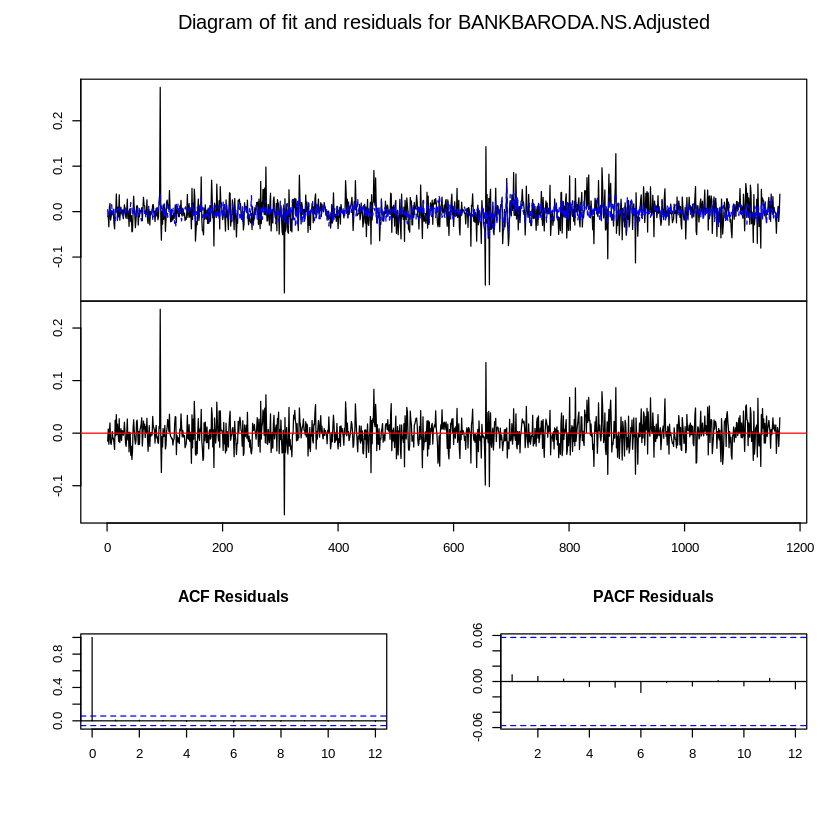

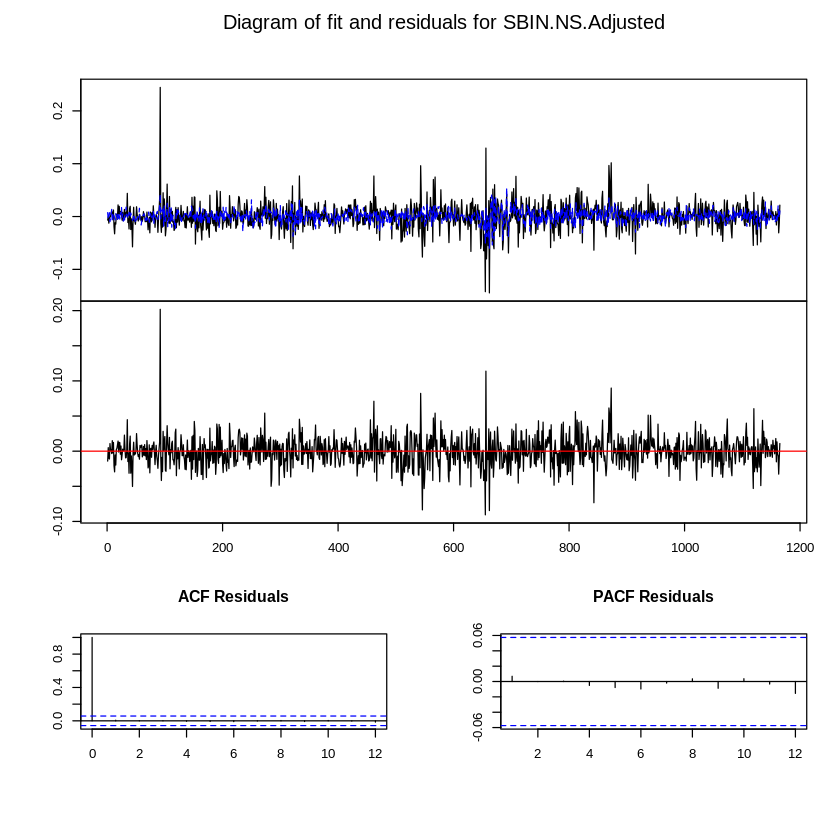

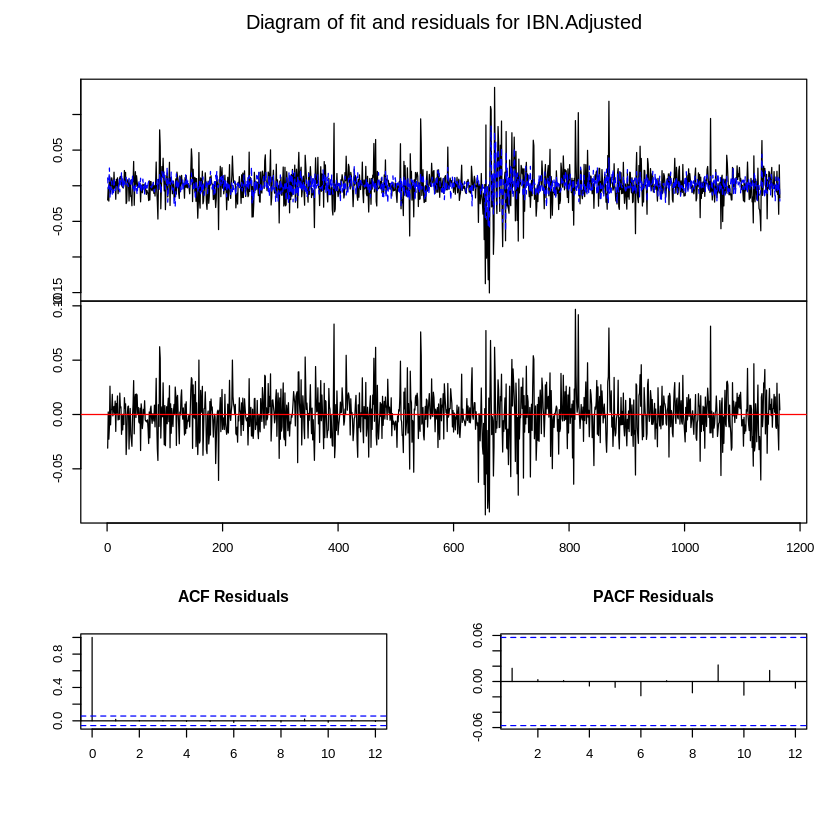

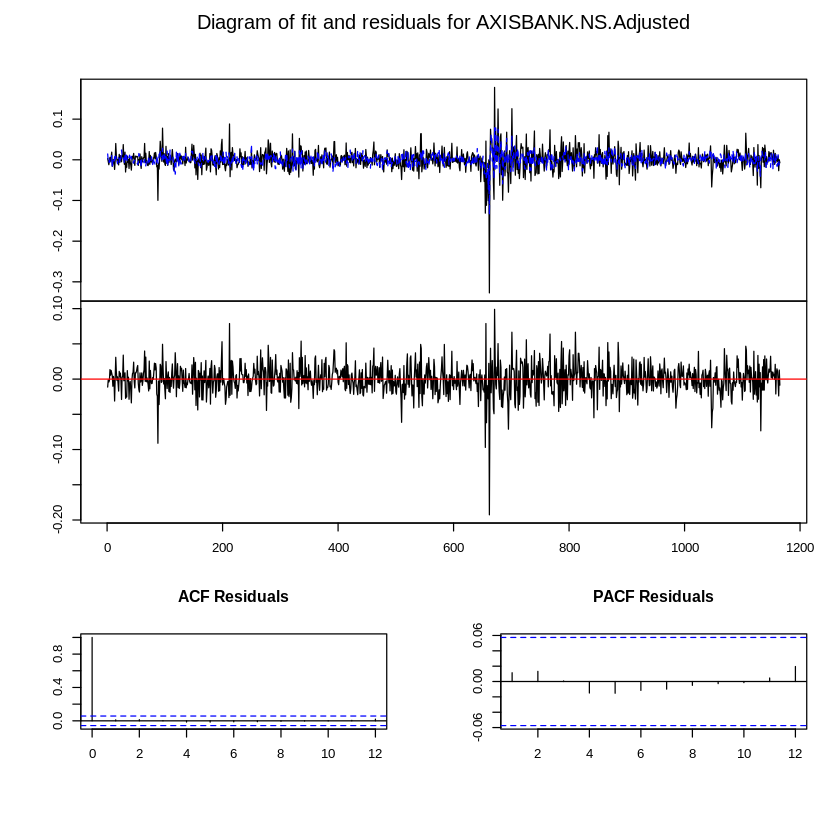

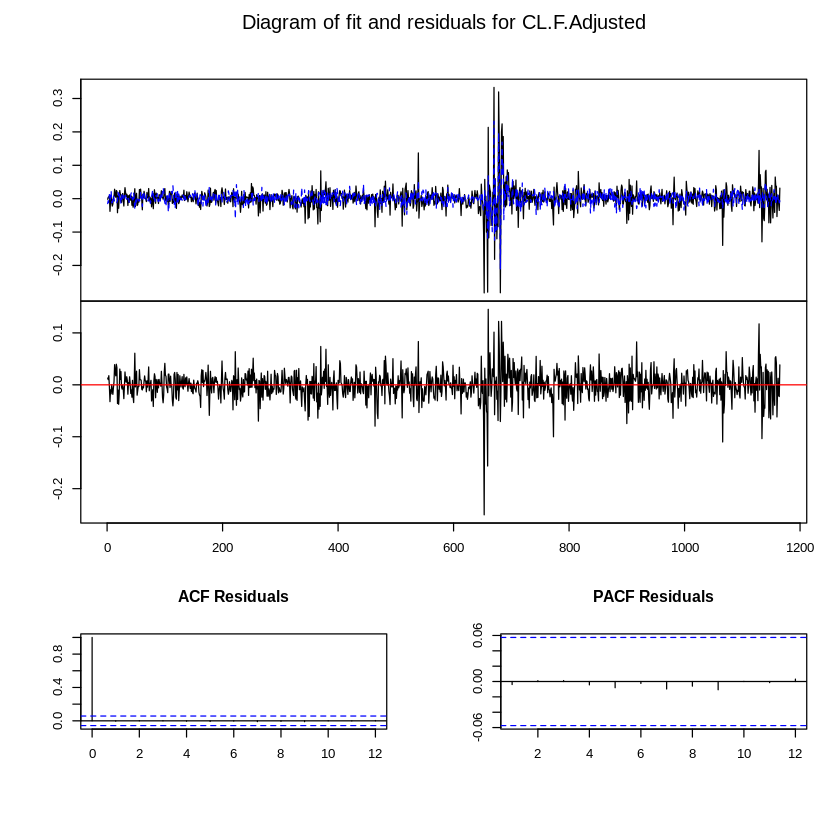

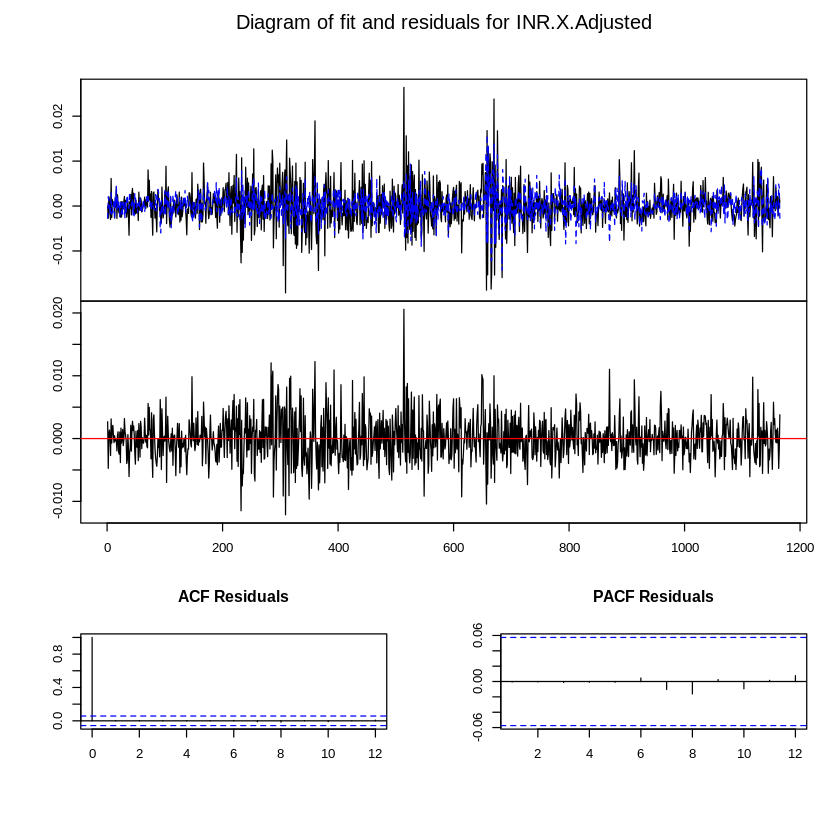

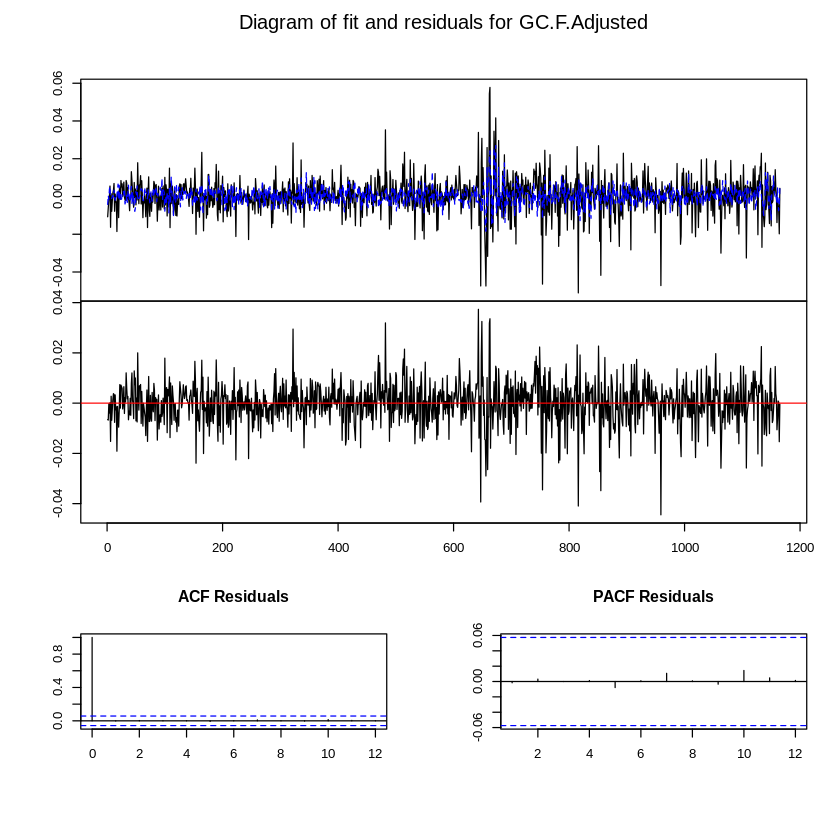

In [271]:
par(mfrow = c(1,1))
plot(var1)

In [272]:

roots(var1)

[1] 0.9687150 0.9687150 0.9623635 0.9623635 0.9610739 0.9610739 0.9590057
  [8] 0.9590057 0.9582574 0.9582574 0.9578656 0.9578656 0.9570792 0.9570792
 [15] 0.9567877 0.9567877 0.9567623 0.9567623 0.9564954 0.9564954 0.9560805
 [22] 0.9560805 0.9557735 0.9557735 0.9557386 0.9557386 0.9552935 0.9552935
 [29] 0.9548678 0.9548678 0.9534898 0.9534898 0.9516236 0.9516236 0.9511872
 [36] 0.9511872 0.9504758 0.9504758 0.9488894 0.9488894 0.9488023 0.9488023
 [43] 0.9487465 0.9487465 0.9483196 0.9483196 0.9471774 0.9471774 0.9468797
 [50] 0.9468797 0.9465490 0.9465490 0.9460491 0.9460491 0.9456323 0.9456323
 [57] 0.9453202 0.9453202 0.9446515 0.9446515 0.9440517 0.9440517 0.9433190
 [64] 0.9433190 0.9430571 0.9430571 0.9414429 0.9414429 0.9411423 0.9411423
 [71] 0.9410528 0.9410528 0.9404551 0.9404551 0.9393365 0.9393365 0.9390096
 [78] 0.9386319 0.9386319 0.9383975 0.9383975 0.9374864 0.9374864 0.9374362
 [85] 0.9374362 0.9373200 0.9373200 0.9355426 0.9355426 0.9351092 0.9351092
 [92] 0.9335085 0.9335085 0.9322655 0.9322655 0.9307045 0.9307045 0.9301586
 [99] 0.9301586 0.9300628 0.9300628 0.9278857 0.9278857 0.9272094 0.9272094
[106] 0.9266597 0.9266597 0.9262540 0.9262540 0.9253258 0.9253258 0.9250546
[113] 0.9250546 0.9235926 0.9235926 0.9228957 0.9228957 0.9225838 0.9225838
[120] 0.9225812 0.9225812 0.9218523 0.9218523 0.9208196 0.9208196 0.9161658
[127] 0.9161658 0.9133063 0.9120104 0.9120104 0.9078139 0.9078139 0.9066169
[134] 0.9066169 0.9064805 0.9064805 0.9061998 0.9061998 0.9036929 0.9036929
[141] 0.9033556 0.9033556 0.9030803 0.9030803 0.9007451 0.9007451 0.8975148
[148] 0.8975148 0.8968419 0.8968419 0.8940645 0.8940645 0.8859577 0.8859577
[155] 0.8841024 0.8841024 0.8747800 0.8747800 0.8732478 0.8732478 0.8724749
[162] 0.8724749 0.8658938 0.8658938 0.8625320 0.8625320 0.8524803 0.8524803
[169] 0.8500030 0.8500030 0.8407512 0.8407512 0.8075249 0.8075249 0.8034721
[176] 0.8034721 0.7858401 0.7858401 0.7693365 0.7693365 0.7201358 0.7201358
[183] 0.6807245 0.6607506 0.6607506 0.6424033 0.6424033 0.6182289 0.6182289

In [273]:
var1_rest <- restrict(var1, method = "ser", thresh = 2)


In [274]:
var1_rest$restrictions


,BANKBARODA.NS.Adjusted.l1,SBIN.NS.Adjusted.l1,IBN.Adjusted.l1,AXISBANK.NS.Adjusted.l1,CL.F.Adjusted.l1,INR.X.Adjusted.l1,GC.F.Adjusted.l1,BANKBARODA.NS.Adjusted.l2,SBIN.NS.Adjusted.l2,IBN.Adjusted.l2,⋯,INR.X.Adjusted.l26,GC.F.Adjusted.l26,BANKBARODA.NS.Adjusted.l27,SBIN.NS.Adjusted.l27,IBN.Adjusted.l27,AXISBANK.NS.Adjusted.l27,CL.F.Adjusted.l27,INR.X.Adjusted.l27,GC.F.Adjusted.l27,const
BANKBARODA.NS.Adjusted,0,0,1,1,0,0,0,1,0,1,⋯,0,1,0,1,0,1,0,0,0,0
SBIN.NS.Adjusted,0,0,1,1,0,1,0,0,0,1,⋯,0,0,0,0,0,1,0,0,0,0
IBN.Adjusted,1,0,1,0,0,0,1,1,1,0,⋯,0,0,0,0,0,1,0,0,1,0
AXISBANK.NS.Adjusted,0,0,1,1,0,1,0,1,0,1,⋯,0,0,0,0,0,1,0,0,0,0
CL.F.Adjusted,1,1,0,0,0,0,0,0,0,1,⋯,0,1,0,0,0,0,1,0,0,0
INR.X.Adjusted,0,0,1,0,0,1,1,0,1,0,⋯,0,1,0,0,0,0,0,0,0,1
GC.F.Adjusted,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [275]:
rowSums(var1_rest$restrictions)


BANKBARODA.NS.Adjusted       SBIN.NS.Adjusted           IBN.Adjusted 
                    24                     17                     32 
  AXISBANK.NS.Adjusted          CL.F.Adjusted         INR.X.Adjusted 
                    22                     37                     27 
         GC.F.Adjusted 
                    16

In [276]:
B(var1_rest)


Warning message:
“Function 'B' is deprecated; use 'Acoef' instead.
See help("vars-deprecated") and help("B-deprecated") for more information.”


,BANKBARODA.NS.Adjusted.l1,SBIN.NS.Adjusted.l1,IBN.Adjusted.l1,AXISBANK.NS.Adjusted.l1,CL.F.Adjusted.l1,INR.X.Adjusted.l1,GC.F.Adjusted.l1,BANKBARODA.NS.Adjusted.l2,SBIN.NS.Adjusted.l2,IBN.Adjusted.l2,⋯,INR.X.Adjusted.l26,GC.F.Adjusted.l26,BANKBARODA.NS.Adjusted.l27,SBIN.NS.Adjusted.l27,IBN.Adjusted.l27,AXISBANK.NS.Adjusted.l27,CL.F.Adjusted.l27,INR.X.Adjusted.l27,GC.F.Adjusted.l27,const
BANKBARODA.NS.Adjusted,0.00000000,0.0000000,0.18455187,-0.1149000,0,0.0000000,0.00000000,-0.06705470,0.00000000,0.11410488,⋯,0,-0.18008236,0,-0.1077636,0,0.14549194,0.0000000,0,0.0000000,0.0000000000
SBIN.NS.Adjusted,0.00000000,0.0000000,0.18470625,-0.1180381,0,0.4128076,0.00000000,0.00000000,0.00000000,0.09508663,⋯,0,0.00000000,0,0.0000000,0,0.07900259,0.0000000,0,0.0000000,0.0000000000
IBN.Adjusted,-0.05486053,0.0000000,0.07032225,0.0000000,0,0.0000000,0.17864393,-0.08471534,0.08899227,0.00000000,⋯,0,0.00000000,0,0.0000000,0,0.05993145,0.0000000,0,-0.1574655,0.0000000000
AXISBANK.NS.Adjusted,0.00000000,0.0000000,0.21684418,-0.1294707,0,0.6893028,0.00000000,-0.06044202,0.00000000,0.16032036,⋯,0,0.00000000,0,0.0000000,0,0.09565838,0.0000000,0,0.0000000,0.0000000000
CL.F.Adjusted,-0.14064703,0.1505511,0.00000000,0.0000000,0,0.0000000,0.00000000,0.00000000,0.00000000,0.15899687,⋯,0,0.20080203,0,0.0000000,0,0.00000000,-0.1027623,0,0.0000000,0.0000000000
INR.X.Adjusted,0.00000000,0.0000000,-0.07772153,0.0000000,0,-0.1803265,-0.04233874,0.00000000,-0.01018766,0.00000000,⋯,0,-0.02356206,0,0.0000000,0,0.00000000,0.0000000,0,0.0000000,0.0002604539
GC.F.Adjusted,0.00000000,0.0000000,0.00000000,0.0000000,0,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0,0.00000000,0,0.0000000,0,0.00000000,0.0000000,0,0.0000000,0.0000000000


In [277]:
A(var1_rest)

Warning message:
“Function 'A' is deprecated; use 'Acoef' instead.
See help("vars-deprecated") and help("A-deprecated") for more information.”


,BANKBARODA.NS.Adjusted.l1,SBIN.NS.Adjusted.l1,IBN.Adjusted.l1,AXISBANK.NS.Adjusted.l1,CL.F.Adjusted.l1,INR.X.Adjusted.l1,GC.F.Adjusted.l1
BANKBARODA.NS.Adjusted,0.00000000,0.0000000,0.18455187,-0.1149000,0,0.0000000,0.00000000
SBIN.NS.Adjusted,0.00000000,0.0000000,0.18470625,-0.1180381,0,0.4128076,0.00000000
IBN.Adjusted,-0.05486053,0.0000000,0.07032225,0.0000000,0,0.0000000,0.17864393
AXISBANK.NS.Adjusted,0.00000000,0.0000000,0.21684418,-0.1294707,0,0.6893028,0.00000000
CL.F.Adjusted,-0.14064703,0.1505511,0.00000000,0.0000000,0,0.0000000,0.00000000
INR.X.Adjusted,0.00000000,0.0000000,-0.07772153,0.0000000,0,-0.1803265,-0.04233874
GC.F.Adjusted,0.00000000,0.0000000,0.00000000,0.0000000,0,0.0000000,0.00000000
,BANKBARODA.NS.Adjusted.l2,SBIN.NS.Adjusted.l2,IBN.Adjusted.l2,AXISBANK.NS.Adjusted.l2,CL.F.Adjusted.l2,INR.X.Adjusted.l2,GC.F.Adjusted.l2
BANKBARODA.NS.Adjusted,-0.06705470,0.00000000,0.11410488,0,0.00000000,0.000000,-0.2369285
SBIN.NS.Adjusted,0.00000000,0.00000000,0.09508663,0,0.00000000,0.000000,-0.1442869


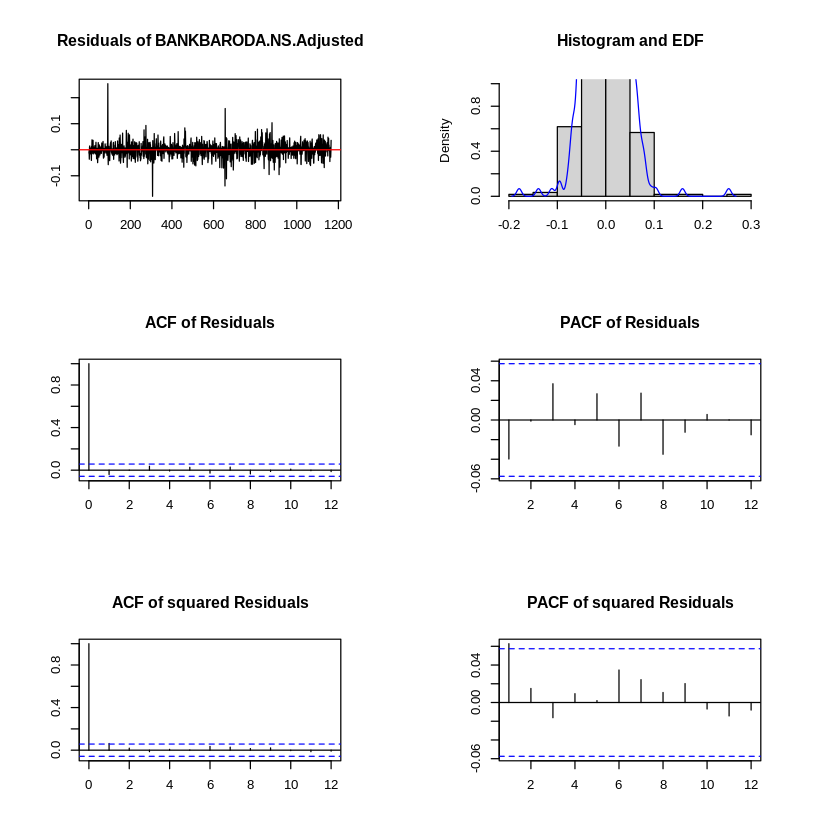

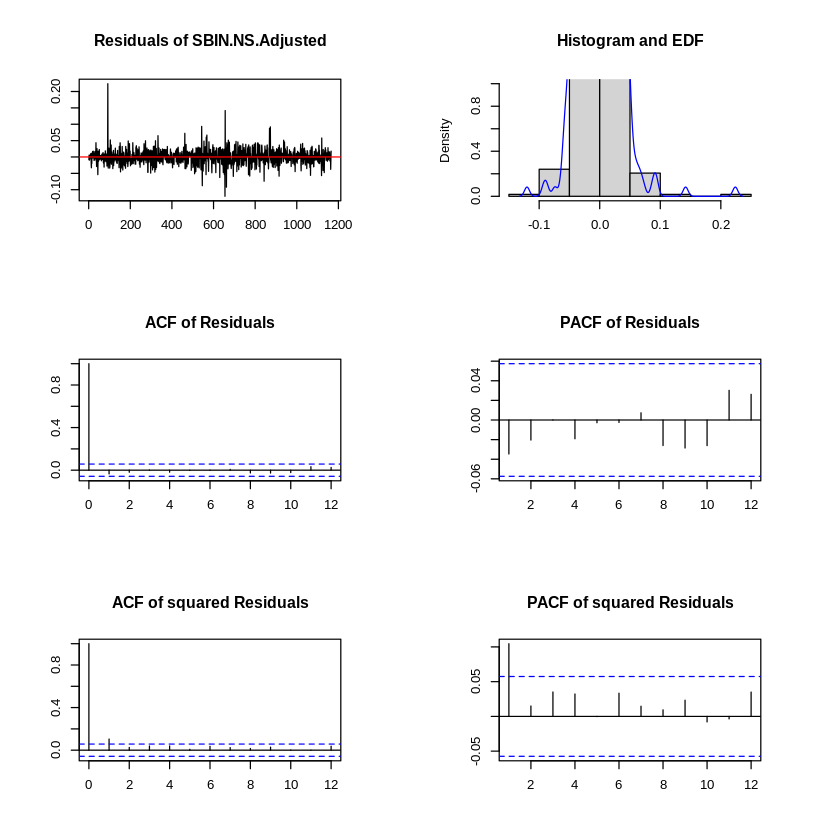

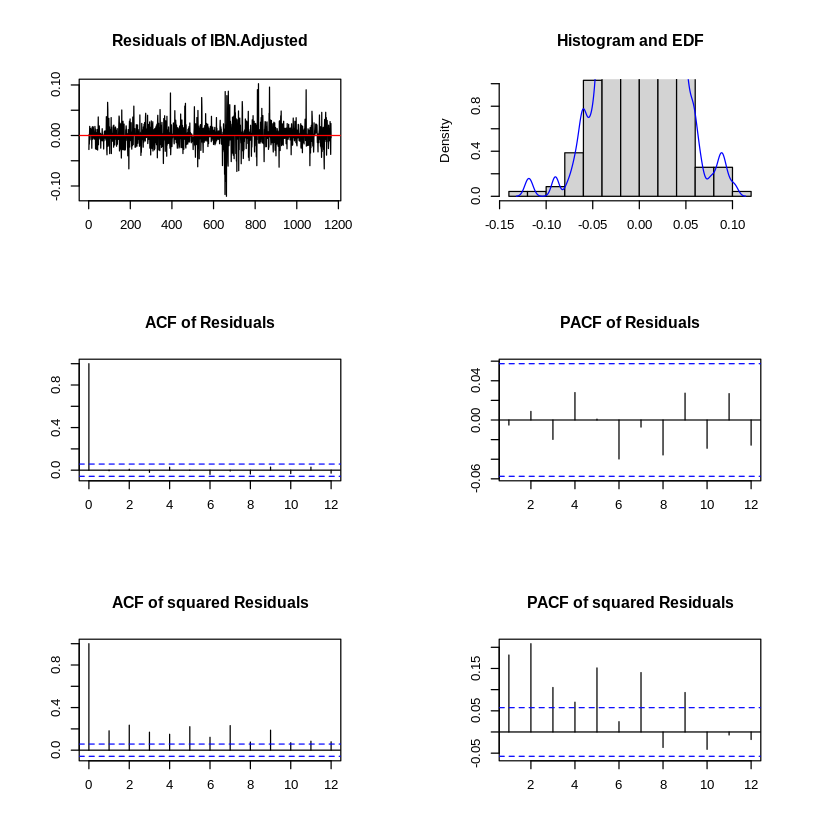

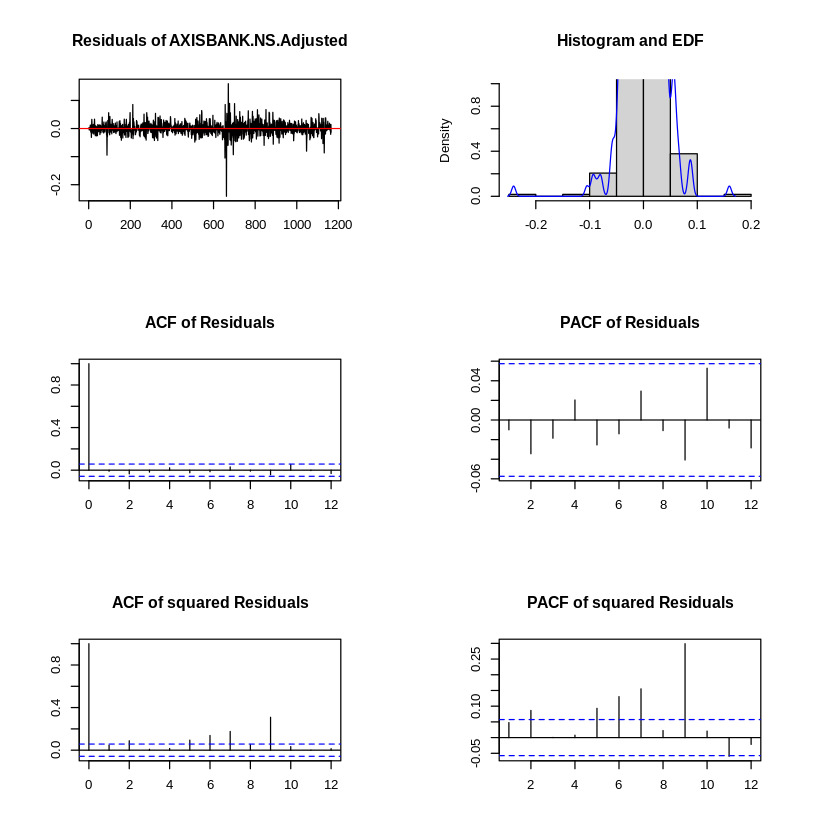

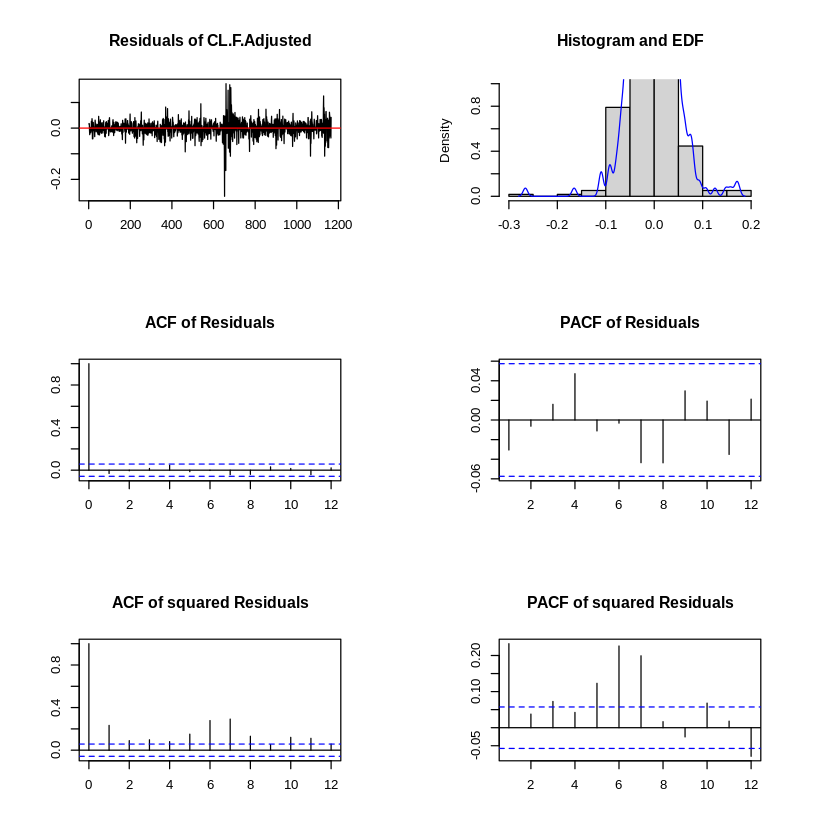

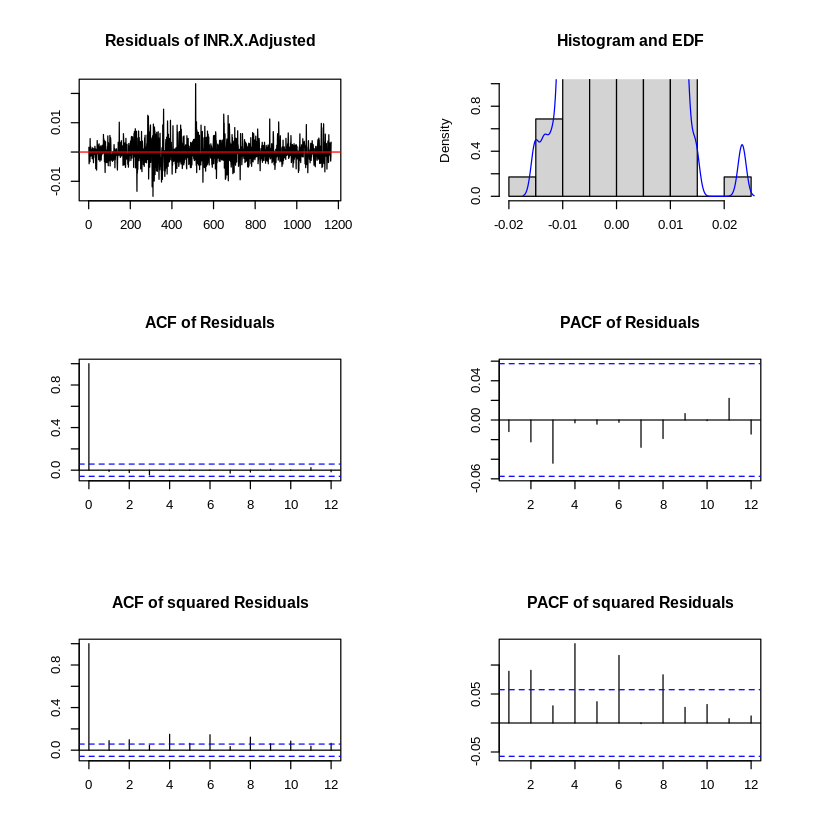

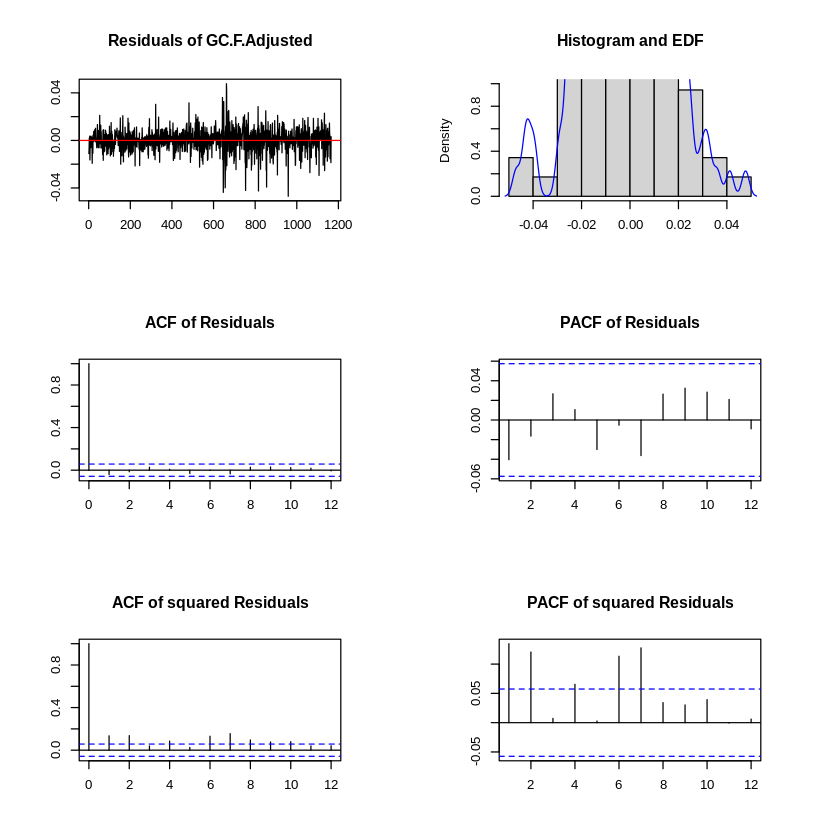

In [281]:
par(mar = c(5,5,5,5))
var1.arch <- arch.test(var1_rest)
var1.norm <- normality.test(var1_rest, multivariate.only = TRUE)
plot(var1.norm)


In [282]:
var1.pt.asy <- serial.test(var1_rest, lags.pt = 10, type = "PT.asymptotic")
var1.pt.adj <- serial.test(var1_rest, lags.pt = 10, type = "PT.adjusted")
var1.BG <- serial.test(var1_rest, lags.pt = 10, type = "BG")
var1.ES <- serial.test(var1_rest, lags.pt = 10, type = "ES")

Warning message in pchisq(STATISTIC, df = PARAMETER):
“NaNs produced”
Warning message in pchisq(STATISTIC, df = PARAMETER):
“NaNs produced”
Warning message in pchisq(STATISTIC, df = PARAMETER):
“NaNs produced”
Warning message in pchisq(STATISTIC, df = PARAMETER):
“NaNs produced”


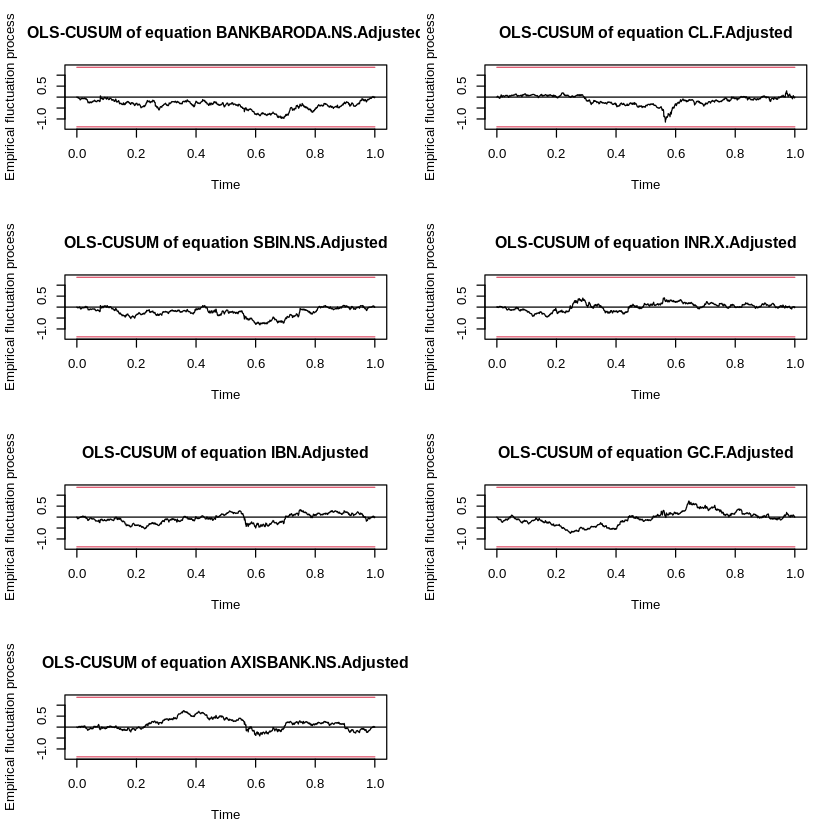

In [283]:
var1.stab <- stability(var1, type = "OLS-CUSUM")
plot(var1.stab)

In [284]:
causality(var1_rest, cause = c("INR.X.Adjusted",	"GC.F.Adjusted"))

$Granger

	Granger causality H0: INR.X.Adjusted GC.F.Adjusted do not
	Granger-cause BANKBARODA.NS.Adjusted SBIN.NS.Adjusted IBN.Adjusted
	AXISBANK.NS.Adjusted CL.F.Adjusted

data:  VAR object var1_rest
F-Test = 1.0955, df1 = 270, df2 = 6825, p-value = 0.1398


$Instant

	H0: No instantaneous causality between: INR.X.Adjusted GC.F.Adjusted
	and BANKBARODA.NS.Adjusted SBIN.NS.Adjusted IBN.Adjusted
	AXISBANK.NS.Adjusted CL.F.Adjusted

data:  VAR object var1_rest
Chi-squared = 28.9, df = 10, p-value = 0.001293



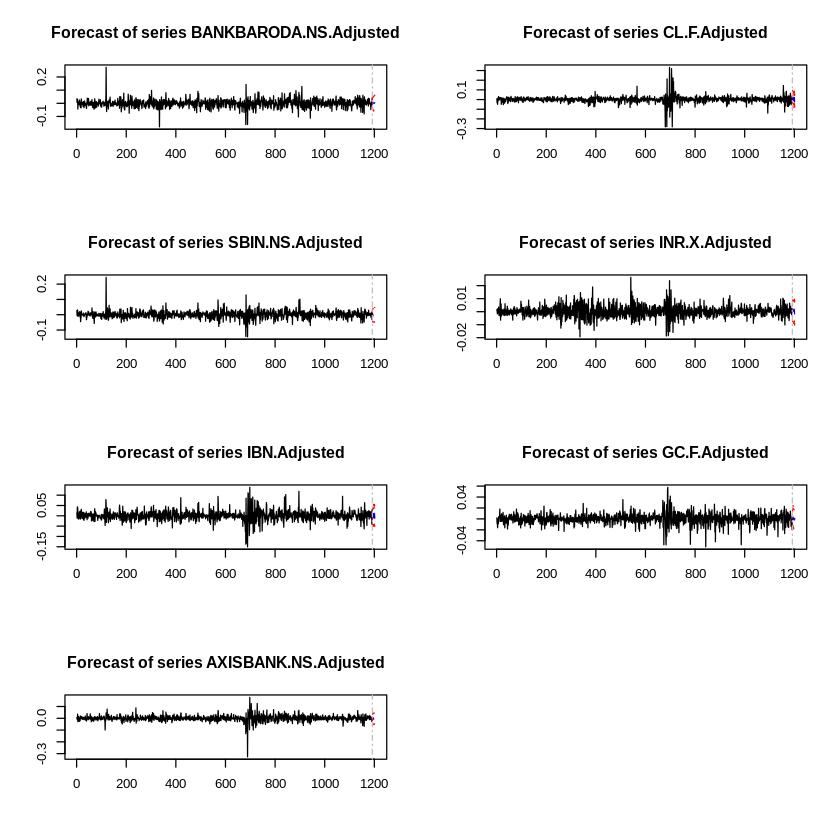

In [285]:
var.f10 <- predict(var1_rest, n.ahead = 10, ci = 0.95)
plot(var.f10)

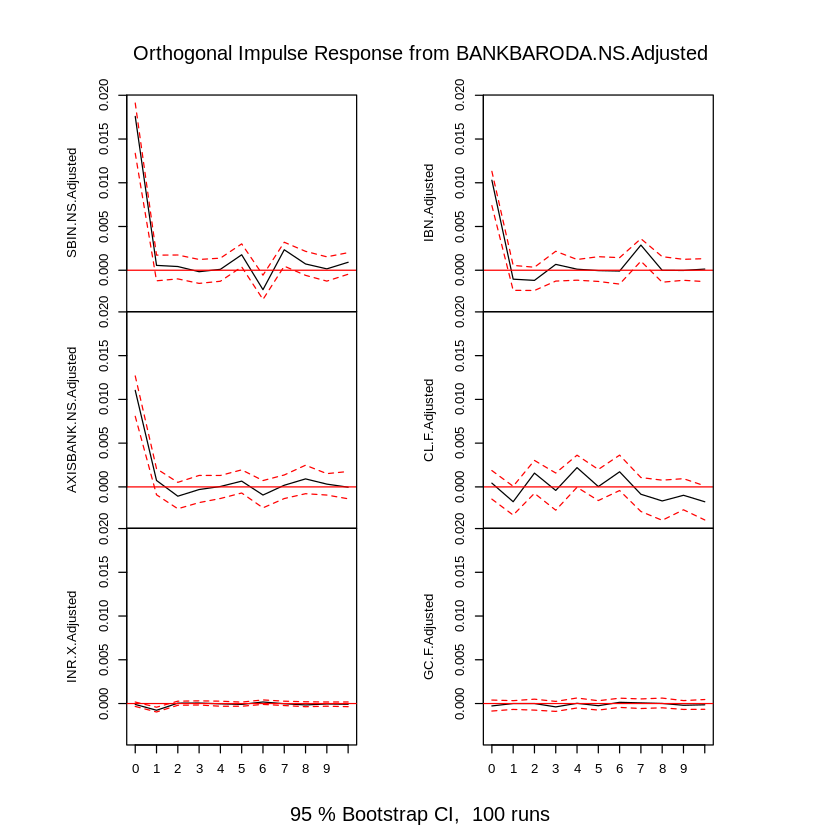

In [288]:
irf1 <- irf(var1_rest, impulse = "BANKBARODA.NS.Adjusted", response = c("SBIN.NS.Adjusted", "IBN.Adjusted", "AXISBANK.NS.Adjusted", "CL.F.Adjusted", "INR.X.Adjusted", "GC.F.Adjusted"), boot = TRUE)
plot(irf1)																													


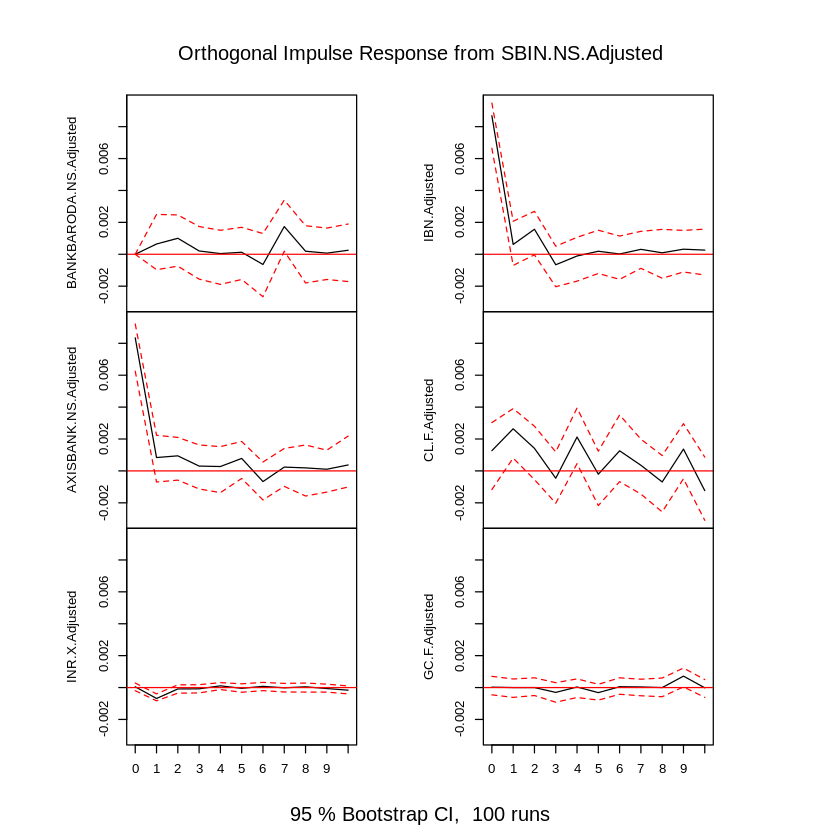

In [289]:
irf2 <- irf(var1_rest, impulse = "SBIN.NS.Adjusted", response = c("BANKBARODA.NS.Adjusted", "IBN.Adjusted", "AXISBANK.NS.Adjusted", "CL.F.Adjusted", "INR.X.Adjusted", "GC.F.Adjusted"), boot = TRUE)
plot(irf2)

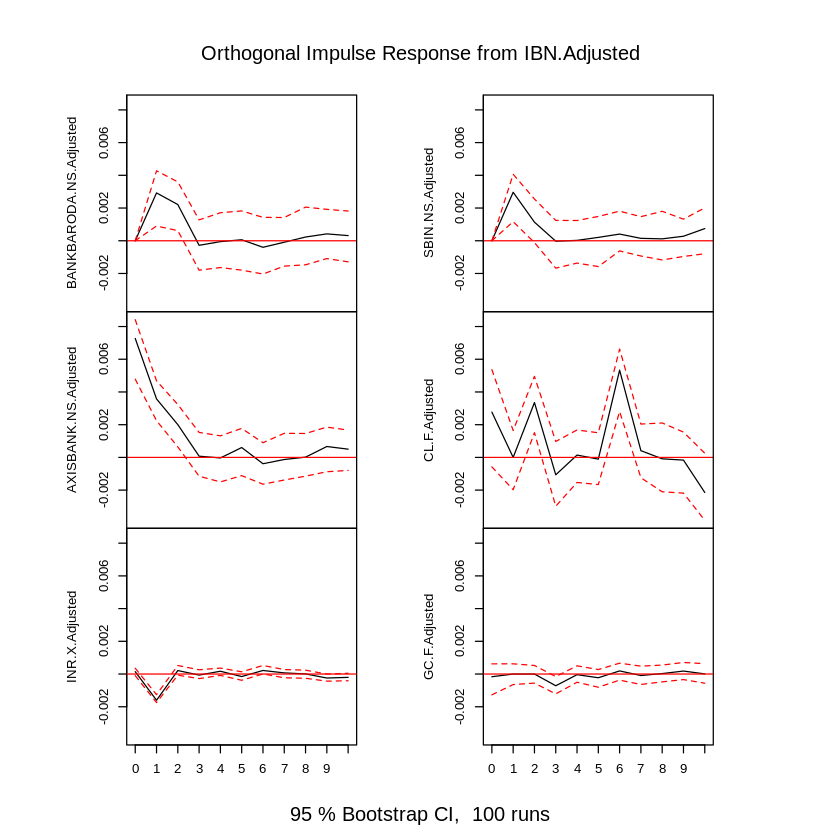

In [290]:
irf3 <- irf(var1_rest, impulse = "IBN.Adjusted", response = c("BANKBARODA.NS.Adjusted", "SBIN.NS.Adjusted", "AXISBANK.NS.Adjusted", "CL.F.Adjusted", "INR.X.Adjusted", "GC.F.Adjusted"), boot = TRUE)
plot(irf3)

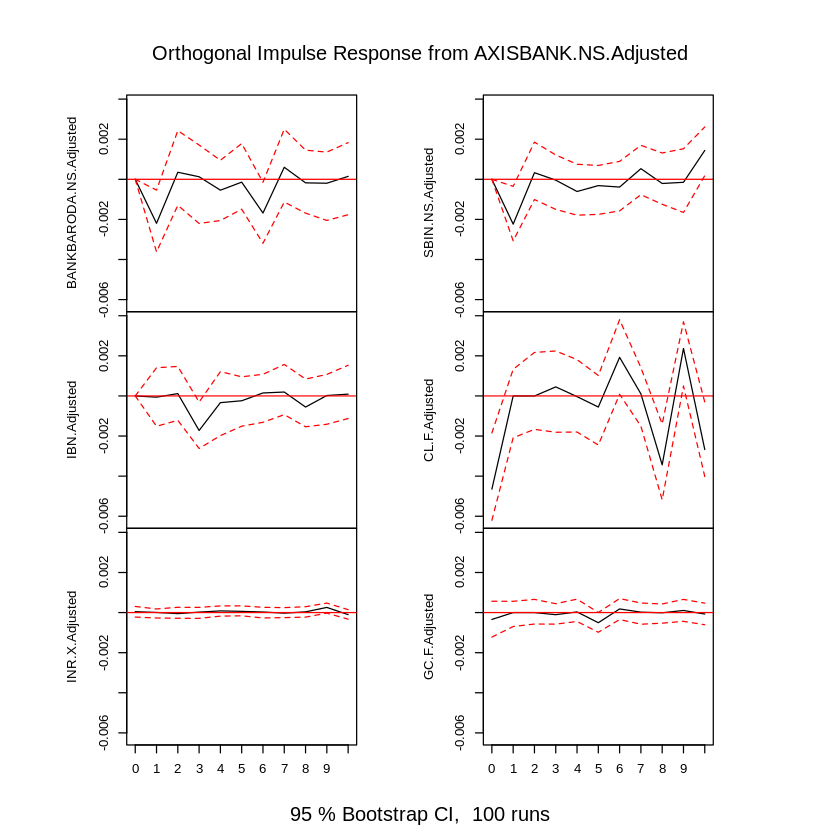

In [291]:
irf4 <- irf(var1_rest, impulse = "AXISBANK.NS.Adjusted", response = c("BANKBARODA.NS.Adjusted", "SBIN.NS.Adjusted", "IBN.Adjusted", "CL.F.Adjusted", "INR.X.Adjusted", "GC.F.Adjusted"), boot = TRUE)
plot(irf4)

In [292]:
y3<-c()
numrows <-nrow(master_returns)
for (i in 1:1000) {
	
	var1 <- VAR(master_returns[(i:(i+numrows-1001)),], p = 5, type = "const")
	forecasts <- predict(var1)
	y<-forecasts$fcst$BANKBARODA.NS.Adjusted[1,1]
	y3<-c(y3,y)
}

RMSE(y3,tail(master_returns$BANKBARODA.NS.Adjusted,1000)) 

[1] 0.03485646

In [293]:
y3<-c()
numrows <-nrow(master_returns)
for (i in 1:1000) {
	
	var1 <- VAR(master_returns[(i:(i+numrows-1001)),], p = 5, type = "const")
	forecasts <- predict(var1)
	y<-forecasts$fcst$SBIN.NS.Adjusted[1,1]
	y3<-c(y3,y)
}

RMSE(y3,tail(master_returns$SBIN.NS.Adjusted,1000)) 

[1] 0.02865594

In [294]:
y3<-c()
numrows <-nrow(master_returns)
for (i in 1:1000) {
	
	var1 <- VAR(master_returns[(i:(i+numrows-1001)),], p = 5, type = "const")
	forecasts <- predict(var1)
	y<-forecasts$fcst$IBN.Adjusted[1,1]
	y3<-c(y3,y)
}

RMSE(y3,tail(master_returns$IBN.Adjusted,1000)) 

[1] 0.03026984

In [295]:
y3<-c()
numrows <-nrow(master_returns)
for (i in 1:1000) {
	
	var1 <- VAR(master_returns[(i:(i+numrows-1001)),], p = 5, type = "const")
	forecasts <- predict(var1)
	y<-forecasts$fcst$AXISBANK.NS.Adjusted[1,1]
	y3<-c(y3,y)
}

RMSE(y3,tail(master_returns$AXISBANK.NS.Adjusted,1000)) 

[1] 0.03055734

In [297]:
# Forecasting with Machine Learning
install.packages("TSstudio")
install.packages("data")
library(TSstudio)
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘RcppEigen’, ‘hts’, ‘later’, ‘thief’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘anytime’, ‘gridExtra’, ‘forecastHybrid’, ‘plotly’, ‘tsibble’, ‘viridis’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘data’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following object is masked from ‘package:DescTools’:

    %like%


The following objects are masked from ‘package:xts’:

    first, last




In [314]:
bob_Lag<-as.data.frame(matrix(unlist(shift(x=master_returns$BANKBARODA.NS.Adjusted, n=1:22, fill=NA, type="lag", give.names=FALSE)),ncol = 10))
names(bob_Lag)<-paste0("BOB_",1:7)

Warning message in matrix(unlist(shift(x = master_returns$BANKBARODA.NS.Adjusted, :
“data length [26224] is not a sub-multiple or multiple of the number of rows [2623]”


In [299]:
SBIN_Lag<-as.data.frame(matrix(unlist(shift(x=master_returns$SBIN.NS.Adjusted, n=1:22, fill=NA, type="lag", give.names=FALSE)),ncol = 10))
names(SBIN_Lag)<-paste0("SBIN_",1:10)

Warning message in matrix(unlist(shift(x = master_returns$SBIN.NS.Adjusted, n = 1:22, :
“data length [26224] is not a sub-multiple or multiple of the number of rows [2623]”


In [300]:
IBN_Lag<-as.data.frame(matrix(unlist(shift(x=master_returns$IBN.Adjusted, n=1:22, fill=NA, type="lag", give.names=FALSE)),ncol = 10))
names(IBN_Lag)<-paste0("IBN_",1:10)

Warning message in matrix(unlist(shift(x = master_returns$IBN.Adjusted, n = 1:22, :
“data length [26224] is not a sub-multiple or multiple of the number of rows [2623]”


In [301]:
CLF_Lag<-as.data.frame(matrix(unlist(shift(x=master_returns$CL.F.Adjusted, n=1:22, fill=NA, type="lag", give.names=FALSE)),ncol = 10))
names(CLF_Lag)<-paste0("CLF_",1:10)

Warning message in matrix(unlist(shift(x = master_returns$CL.F.Adjusted, n = 1:22, :
“data length [26224] is not a sub-multiple or multiple of the number of rows [2623]”


In [303]:
INR_Lag<-as.data.frame(matrix(unlist(shift(x=master_returns$INR.X.Adjusted, n=1:22, fill=NA, type="lag", give.names=FALSE)),ncol = 10))
names(INR_Lag)<-paste0("INR_",1:10)

Warning message in matrix(unlist(shift(x = master_returns$INR.X.Adjusted, n = 1:22, :
“data length [26224] is not a sub-multiple or multiple of the number of rows [2623]”


In [304]:
GCF_Lag<-as.data.frame(matrix(unlist(shift(x=master_returns$GC.F.Adjusted, n=1:22, fill=NA, type="lag", give.names=FALSE)),ncol = 10))
names(GCF_Lag)<-paste0("GCF_",1:10)

Warning message in matrix(unlist(shift(x = master_returns$GC.F.Adjusted, n = 1:22, :
“data length [26224] is not a sub-multiple or multiple of the number of rows [2623]”


In [305]:
master2<-cbind(as.data.frame(master_returns),bob_Lag,SBIN_Lag,IBN_Lag,CLF_Lag,INR_Lag,GCF_Lag)
master2<-na.omit(master2)

ERROR: ignored

In [315]:
dim(bob_Lag)

[1] 2623   10